In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from pyfd3d.nonuniform_grid import *

In [2]:
#need to specify a corase region, a fine region and an intermediate region

In [18]:
Nfine = [100,100,100]; #specify nx, ny for each region
Ncoarse = [50,50,50];
Ntran =   [50,50,50]; # 2) specify the dx and dy of each region
dx1 = 0.02; dy1 = 0.02;
dx2 = 0.005; dy2 = 0.005;
dz1 = 0.02
dz2 = 0.005
dfine = [dx2, dy2, dz2];
dcoarse = [dx1, dy1, dz1];

#stack the vectors
# drt does not have a value...
Nft = np.vstack((Ncoarse, Ntran, Nfine, Ntran, Ncoarse));
drt = np.vstack((dcoarse, dtran, dfine, dtran, dcoarse));

print(Nft, Ncoarse)

[[ 50  50  50]
 [ 50  50  50]
 [100 100 100]
 [ 50  50  50]
 [ 50  50  50]] [50, 50, 50]


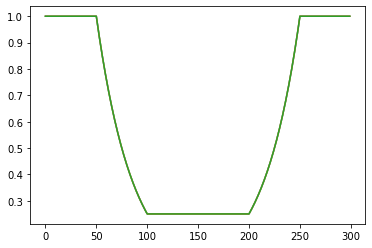

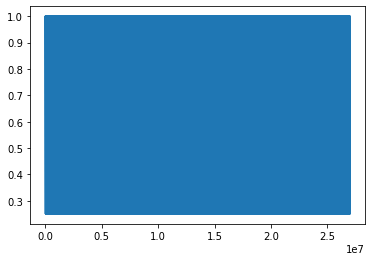

In [19]:
dr_reference  = dcoarse;
[dx_scale, dy_scale, dz_scale] = generate_nonuniform_scaling(Nft, drt/dr_reference);


plt.plot(dx_scale)
plt.plot(dy_scale)
plt.plot(dz_scale)
[DX, DY, DZ] = np.meshgrid(dx_scale, dy_scale, dz_scale, indexing = 'ij')
plt.figure()
plt.plot(DZ.flatten())


In [20]:
dx_scale, dy_scale, dz_scale = generate_nonuniform_scaling(
    Nft, 
    drt, 
)

In [22]:
out = non_uniform_scaling_operator(dx_scale, dy_scale, dz_scale)

(27000000, 27000000)